## Cumulative walltime/cputime per month

Evaluate walltime and cputime accumulated each month since the beginning of the current year.

In [1]:
import helpers as h
import pandas as pd

influx_url = 'http://localhost:8086/write?db=alice'

Choose a month and year:

In [2]:
month = 5
year = 2021

### Walltime:

In [3]:
metric = "jobResUsageSum_time_run"

# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
wallt_monalisa = {}
wallt_egi = {}
wallt_ratio = {}
for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    wallt_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumelap/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'walltime')
    wallt_egi[m] = h.remap_egi(values_egi[m])
    wallt_ratio[m] =dict((k, (1.0 - float(wallt_monalisa[m][k]) / float(wallt_egi[m][k])) * 100.) for k in wallt_monalisa[m])
    #print wallt_ratio[m]
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'walltime', 'monalisa', wallt_monalisa[m])
    h.write_influx(influx_url, m, year, 'walltime', 'egi', wallt_egi[m])
    h.write_influx(influx_url, m, year, 'walltime', 'ratio', wallt_ratio[m])

In [4]:
df_ratio = pd.DataFrame.from_dict(wallt_ratio, dtype=float, orient='index')    
print df_ratio

      TORINO   TRIESTE      BARI   CATANIA   LEGNARO        CNAF
1   3.151481  2.875630  0.599577 -2.385446  4.008577    1.285461
2  31.378881  3.910949  4.072779 -1.295511  3.466757    0.200098
3   1.809017  6.121720 -1.026887 -1.386122  2.677266    2.388815
4   0.321693  1.645194  1.398075  1.194560  1.090587   -2.094035
5   6.809796  9.130290  3.431774  2.502223  2.911535 -658.060167


In [5]:
df_ratio = df_ratio.drop(['CNAF','TRIESTE'], axis=1)

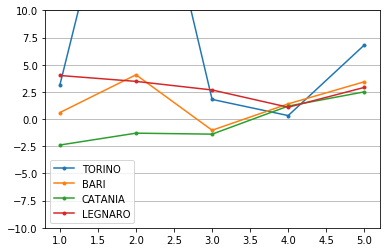

In [11]:
plot_ratio = df_ratio.plot(style='.-')
plot_ratio.set_ylim(-10, 10)
plot_ratio.grid(True, axis='y')

### Cputime

In [12]:
metric = "jobResUsageSum_time_cpu"

# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
cput_monalisa = {}
cput_egi = {}
cput_ratio = {}

for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    cput_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumcpu/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'cputime')
    cput_egi[m] = h.remap_egi(values_egi[m])
    cput_ratio[m] =dict((k, (1.0 - float(cput_monalisa[m][k]) / float(cput_egi[m][k])) * 100.) for k in cput_monalisa[m])
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'cputime', 'monalisa', cput_monalisa[m])
    h.write_influx(influx_url, m, year, 'cputime', 'egi', cput_egi[m])
    h.write_influx(influx_url, m, year, 'cputime', 'ratio', cput_ratio[m])

In [13]:
df_ratio = pd.DataFrame.from_dict(cput_ratio, dtype=float, orient='index')    
print df_ratio

     TORINO    TRIESTE       BARI   CATANIA    LEGNARO        CNAF
1  5.850449   3.158121   9.373927  1.345330   9.566494   12.826032
2  4.038510   5.547648  10.909521  3.687012   9.714714   10.515063
3  6.290347   6.606607  11.775457  8.735883   8.475115    9.123795
4  2.496867   6.873224  10.053843  7.723384   6.237372   10.277060
5  8.534562  15.760486  11.281219  9.073384  12.211191 -772.991109


In [14]:
df_ratio = df_ratio.drop(['CNAF','TRIESTE'], axis=1)

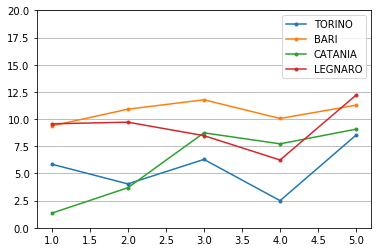

In [17]:
plot_ratio = df_ratio.plot(style='.-')
plot_ratio.set_ylim(0, 20)
plot_ratio.grid(True, axis='y')

## Monalisa cumulative walltime/cputime per year
Evaluate walltime and cputime accumulated each year from the beginning of the year up to the current month.

### Walltime

In [20]:
import helpers as h
import pandas as pd

year= 2021
month = 5
values = {}
time = {}
metric = "jobResUsageSum_time_run"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

In [21]:
dataframe = pd.DataFrame.from_dict(time, dtype=int, orient='index')
# Exclude CNAF
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print dataframe

       TORINO  CATANIA     BARI  LEGNARO
2014  2668350  2157047  2627454  3102386
2015  3489004  3631703  2984178  5846800
2016  3988298  5595157  8137818  5253334
2017  4192919  4705078  6118273  6047207
2018  2983572  5641358  5932277  4789435
2019  5906858  5611920  8854725  6924049
2020  5447292  2630728  7311146  7630580
2021  6043959  5829662  9980818  7711270


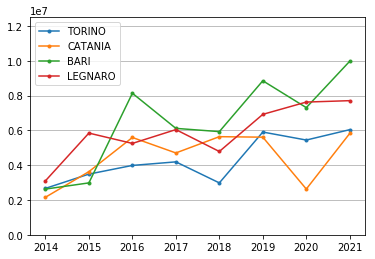

In [22]:
plot = dataframe.plot(style='.-')
plot.set_ylim(0, 12500000)
plot.grid(True, axis='y')

### Cputime

In [23]:
metric = "jobResUsageSum_time_cpu"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

In [24]:
dataframe = pd.DataFrame.from_dict(time, dtype=int, orient='index')
# Exclude CNAF
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print dataframe

       TORINO  CATANIA     BARI  LEGNARO
2014  2020000  1296500  2169000  2330000
2015  2956000  2732800  2584000  4949000
2016  3071000  4390100  7086000  4163999
2017  3227000  3356600  5253000  4950000
2018  2166000  4021600  4980000  3786000
2019  3098000  4252500  7521000  5732000
2020  2331000  1956900  5865000  5837000
2021  4155000  4405199  6657000  5466000


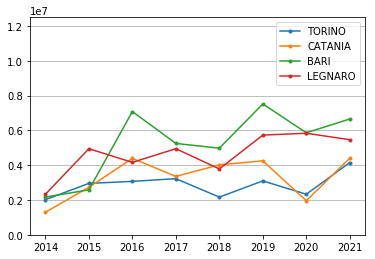

In [25]:
plot = dataframe.plot(style='.-')
plot.set_ylim(0, 12500000)
plot.grid(True, axis='y')